In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [0]:
%load_ext tensorboard

In [0]:
!rm -rf ./logs/

In [0]:
from google.colab import files
files.upload()

Saving birth_life_2010.txt to birth_life_2010.txt


{'birth_life_2010.txt': b'Country\tBirth rate\tLife expectancy\nVietnam\t1.822\t74.828243902\nVanuatu\t3.869\t70.819487805\nTonga\t3.911\t72.150658537\nTimor-Leste\t5.578\t61.999853659\nThailand\t1.579\t73.927658537\nSolomon Islands\t4.229\t67.465195122\nSingapore\t1.15\t81.641463415\nSamoa\t3.86\t72.306390244\nPhilippines\t3.142\t68.484317073\nPapua New Guinea\t3.951\t62.440609756\nNew Zealand\t2.16\t80.702439024\nNew Caledonia\t2.141\t76.301682927\nMyanmar\t2.002\t64.662097561\nMongolia\t2.504\t68.194975610\nMicronesia\t3.451\t68.764829268\nMalaysia\t2.635\t74.024560976\nMacao SAR, China\t1.092\t80.775317073\nLao PDR\t2.747\t67.064\nKorea\t1.22\t80.761951220\nJapan\t1.39\t82.932682927\nIndonesia\t2.117\t68.889658537\nHong Kong SAR, China\t1.108\t82.878048780\nGuam\t2.47\t75.994268293\nFrench Polynesia\t2.09\t75.076878049\nFiji\t2.668\t69.225829268\nDem. Rep. Korea\t2.022\t68.532146341\nChina\t1.598\t73.273097561\nCambodia\t2.581\t62.536219512\nBrunei\t2.042\t77.932024390\nAustralia\t

In [0]:
import numpy as np
def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    return data, n_samples

In [0]:
data, n_samples = read_birth_life_data("birth_life_2010.txt")
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
  ])
EPOCHS=100
optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)
model.compile(loss='mse',optimizer=optimizer)
model.fit(data[:,0],data[:,1],epochs=EPOCHS)
w = model.layers[0].get_weights()[0][0][0]
b = model.layers[0].get_weights()[1][0]
print(w, b)

Train on 190 samples
Epoch 1/100
190/190 [==============================] - 0s 1ms/sample - loss: 1925.9730
Epoch 2/100
190/190 [==============================] - 0s 74us/sample - loss: 1021.7611
Epoch 3/100
190/190 [==============================] - 0s 78us/sample - loss: 794.2246
Epoch 4/100
190/190 [==============================] - 0s 70us/sample - loss: 647.6645
Epoch 5/100
190/190 [==============================] - 0s 68us/sample - loss: 518.6246
Epoch 6/100
190/190 [==============================] - 0s 71us/sample - loss: 415.1046
Epoch 7/100
190/190 [==============================] - 0s 63us/sample - loss: 338.4077
Epoch 8/100
190/190 [==============================] - 0s 62us/sample - loss: 287.9216
Epoch 9/100
190/190 [==============================] - 0s 61us/sample - loss: 234.7006
Epoch 10/100
190/190 [==============================] - 0s 90us/sample - loss: 188.0607
Epoch 11/100
190/190 [==============================] - 0s 60us/sample - loss: 175.9994
Epoch 12/100
190/19

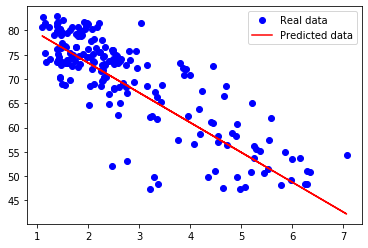

In [0]:
import matplotlib.pyplot as plt
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()